### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

%matplotlib inline

### Useful Functions

In [2]:
def plot_data(X, centroids=None, c=None):
    """
    Plot 2D data and, if given, centroids.
        
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], cmap='rainbow', alpha=0.8, edgecolors="black", c=c, s=80)
    
    # plot centroids if given
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', linewidths=5, s=120, alpha=0.8)

In [3]:
def initialize_centroids(X, K):
    """
    Randomly intialize centroids to have the coords of some dataset example.
    """
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:K]]
    
    return centroids

In [4]:
def assign_centroids(X, centroids):
    """
    Assign each example in dataset the centroid closest to it.
    """
    m = X.shape[0]
    idx = np.zeros(m, dtype=int)
    
    for i in range(m):
        x = X[i, :]
        d = np.sum((x - centroids)**2, axis=1)
        idx[i] = np.argmin(d)
    
    return idx

In [5]:
def adjust_centroids(X, idx, K):
    """
    Compute the new coords of the centroids as the mean of all the
    dataset examples assigned to it.
    """
    centroids = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx==k], axis=0)
        
    return centroids

In [6]:
def compute_cost(X, centroids, idx):
    """
    Compute the total cost (error) given the dataset and trained centroids.
    """
    J = np.sum((X - centroids[idx])**2)
    
    return J

In [7]:
def run_KMeans(X, K, max_iter=10):
    """
    Run the K-Means algorithm.
    
    Note: max_iter corresponds to the number of times the loop of 
    assign_centroids and adjust_centroids should run.
    """
    m, n = X.shape
    
    # variables to find the best centroids
    best_centroids = np.zeros((K, n))
    best_idx = np.zeros(m, dtype=int)
    curr_J = None
    
    # run the algorithm many times as to not get stuck on a local minimum
    for k in range(50):
        centroids = initialize_centroids(X, K)

        for i in range(max_iter):
            idx = assign_centroids(X, centroids)
            centroids = adjust_centroids(X, idx, K)
        
        J = compute_cost(X, centroids, idx)
        
        # update best_centroids and best_idx if cost is lower
        if (curr_J == None) or (J < curr_J):
            curr_J = J
            best_centroids = centroids
            best_idx = idx
    
    return best_centroids, best_idx

### Synthetic Data

In [8]:
X, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.9,
    random_state=10
)

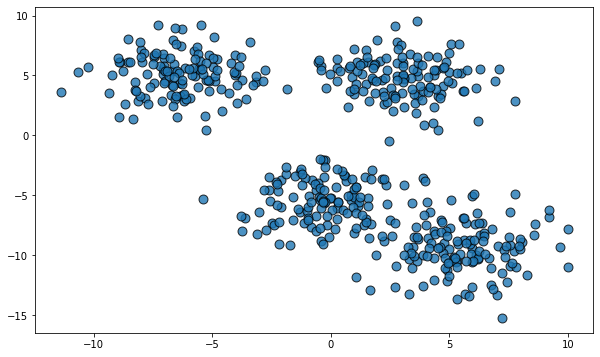

In [9]:
plot_data(X)

### Training the Model

In [10]:
K = 4
max_iter = 10

centroids, idx = run_KMeans(X, K, max_iter)

### Plotting the Result

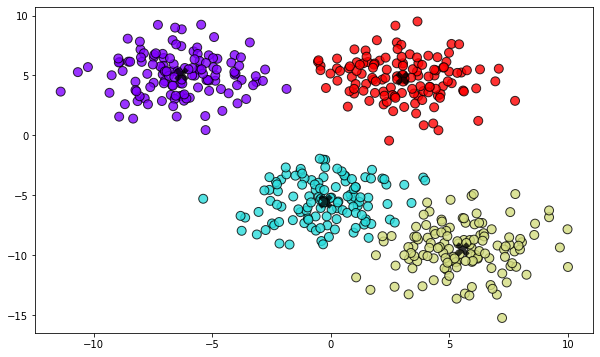

In [11]:
plot_data(X, centroids, c=idx)

By running the K-Means algorithm multiple times and using the centroids that give the lowest cost, we made sure that our model does not get stuck at a local minimum and we see that it does a pretty good job of identifying the clusters. In the cells below we use the sklearn's implementation of K-Means algorithm to see how it performs on our dataset.

### K-Means with sklearn

In [12]:
from sklearn.cluster import KMeans

In [13]:
# fit model
model = KMeans(n_clusters=K)
model.fit(X)

# extract centriods and idx
idx = model.labels_
centroids = model.cluster_centers_

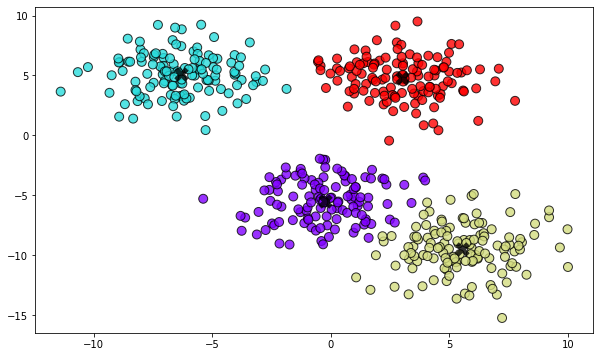

In [14]:
# plot result
plot_data(X, centroids, c=idx)